*Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.*

*Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.*

*Вам предстоит изучить:
как клиенты пользуются сервисом,
когда делают первые покупки на сайте,
сколько денег приносит компании каждый клиент,
когда расходы на привлечение клиента окупаются.*

*Выручка измеряется в условных единицах — у.е.*

*План работы:*

1. Загрузка данных и подготовка их к анализу

2. Построить отчёты и посчитать метрики

3. Написать вывод: рекомендация для  маркетологов, куда и сколько им стоит вкладывать денег?

## Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [2]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


*Форматы столбцов end ts и start ts необходимо поменять с object на datetime*

In [3]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [4]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [5]:
visits.duplicated().sum()

0

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


*Форматы столбца buy ts необходимо поменять с object на datetime*

In [7]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [8]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [9]:
orders.duplicated().sum()

0

In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


*Форматы столбца dt необходимо поменять с object на datetime*

In [11]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [12]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [13]:
costs.duplicated().sum()

0

*Приведем названия столбцов к нижнему регистру*

In [14]:
visits.columns = visits.columns.str.lower()
visits

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [15]:
orders.columns = orders.columns.str.lower()
orders

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [16]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


## Построить отчёты и посчитать метрики

*Посчитаем продуктовые метрики. Сначала найдем DAU, WAU, MAU за весь период*

In [17]:
visits['start ts'] = pd.to_datetime(visits['start ts'])
visits['end ts'] = pd.to_datetime(visits['end ts'])
visits['session_year']  = visits['start ts'].dt.year
visits['session_month'] = visits['start ts'].dt.month
visits['session_week']  = visits['start ts'].dt.week
visits['session_date'] = visits['start ts'].dt.date
visits['session_day'] = visits['start ts'].dt.day

dau_total = visits.groupby(['session_year', 'session_date']).agg({'uid': 'nunique'}).mean().astype(int)
wau_total = (visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()).astype(int)
mau_total = (visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()).astype(int)

In [18]:
dau_total

uid    907
dtype: int64

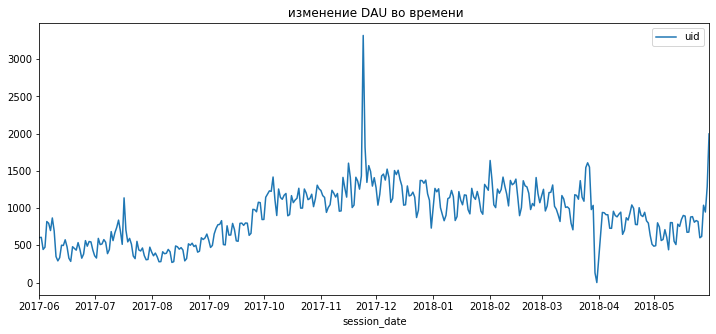

In [19]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).astype(int).plot(figsize=(12, 5), title=' изменение DAU во времени')

*Увелчение активных пользователей в день с августа 2017 года. Пик таковых отмечается в ноябре, а падение в марте 2018-го. В среднем, активных пользователей в день 907 человек*

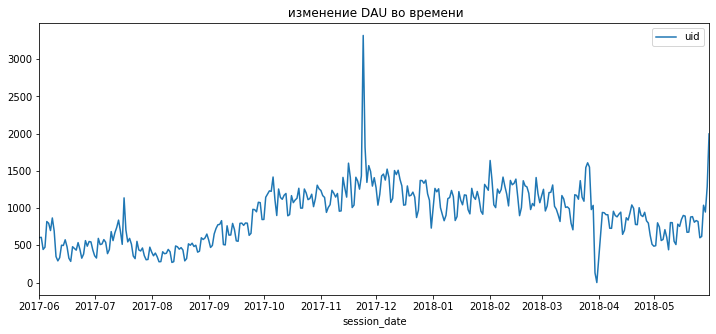

In [20]:
(visits.groupby('session_date').agg({'uid': 'nunique'})
 .astype(int)
 .plot(figsize=(12, 5), title=' изменение DAU во времени')
)

In [21]:
visits.head()

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,1
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,27


In [22]:
visits['session_day'].unique()

array([20, 19,  1, 27,  3, 30,  5,  8, 14, 25,  6, 23, 12, 17, 16, 21, 26,
       22,  9, 10, 24, 13, 28,  7,  2, 15,  4, 31, 11, 29, 18])

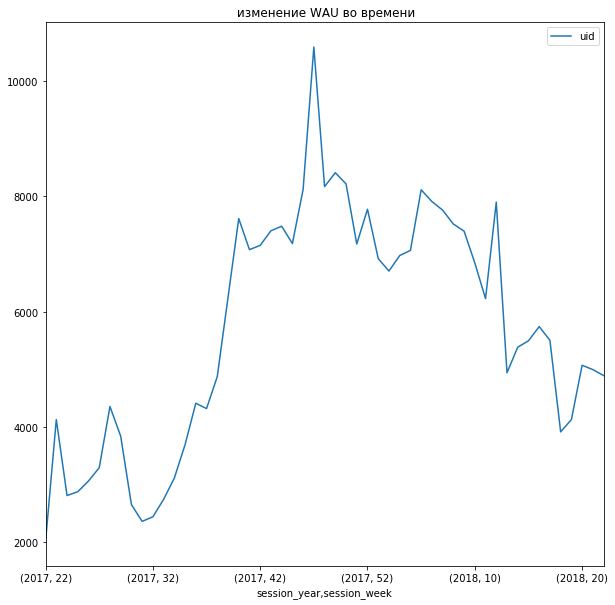

In [23]:
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).astype(int).plot(figsize=(10, 10), title=' изменение WAU во времени')

In [24]:
wau_total

uid    5716
dtype: int64

*Понедельный график указывает на уверенный рост активного числа пользователей с 32 недели "жизни" анализируемого датасета с пиком активности приблизительно на 47 неделе. Число активных пользователей не упало ниже стартового. Среднее число пользователей равно 5716 человек.*

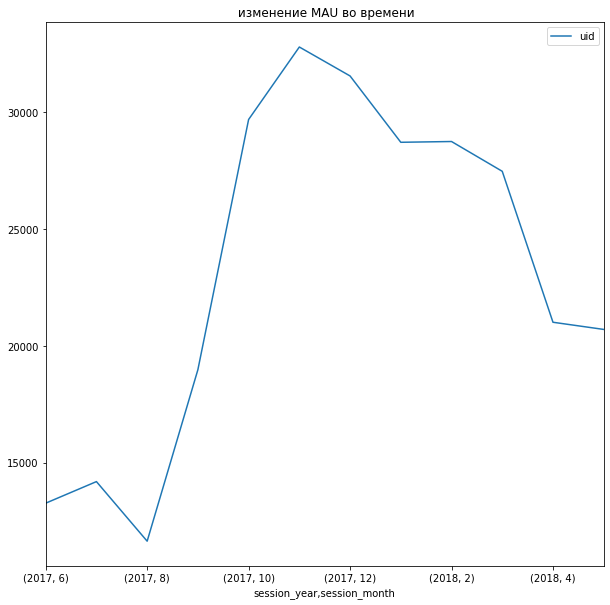

In [25]:
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).astype(int).plot(figsize=(10, 10), title=' изменение MAU во времени')

In [26]:
mau_total

uid    23228
dtype: int64

*С августа активные пользователи в месяц резко возрасли, считаю, что это обусловлено началом театрального и киносезонов или активной работой маркетингового отдела. Пик, как и с дневным графиком, выпал на ноябрь месяц и продолжился посленовогодным падением. Среднее количество посетителей в месяц составляет 23.228 человек.*

*Определим, сколько раз за день пользователи в среднем заходят на сайт*

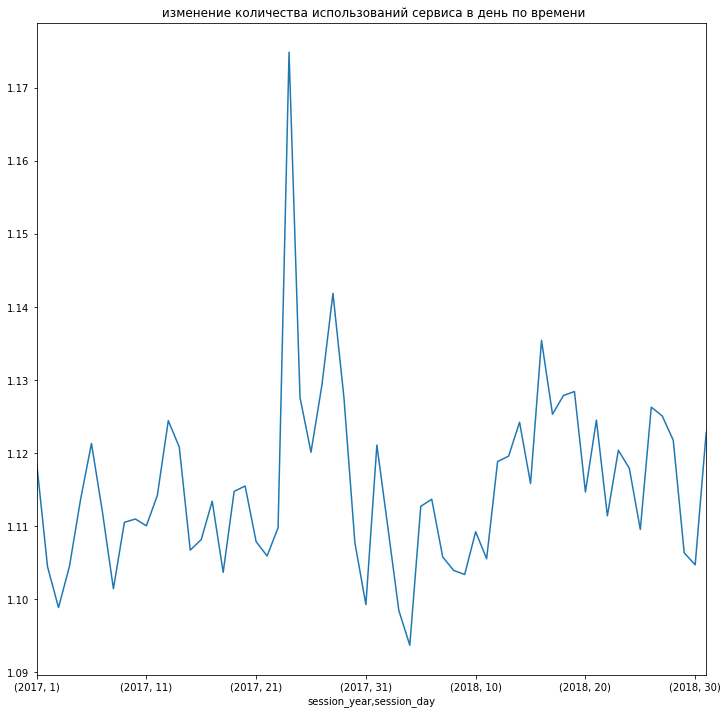

In [27]:
sessions_per_user = visits.groupby(['session_year', 'session_day']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user['sessions_per_user'].plot(figsize=(12, 12), title=' изменение количества использований сервиса в день по времени');

*Узнаем продолжительность типичной пользовательской сессии за весь период*

In [28]:
visits['session_duration_sec'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits['session_duration_sec'].mode()

0    60
dtype: int64

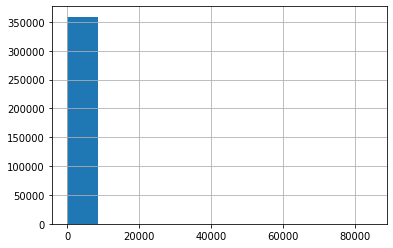

In [29]:
visits['session_duration_sec'].hist(label ='продолжительность пользовательской сессии за весь период');

*Рассчитаем Retention Rate*

In [30]:
first_activity_time = visits.groupby(['uid'])['start ts'].min()
first_activity_time.name = 'first_activity_time'
visits = visits.join(first_activity_time, on='uid')
 
visits['session_month'] = visits['start ts'].astype('datetime64[M]')
visits['first_session_month'] = visits['first_activity_time'].astype('datetime64[M]')
 
visits['cohort_lifetime'] = visits['session_month'] - visits['first_session_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 
 
cohorts = visits.groupby(['first_session_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
 
cohorts = visits.groupby(['first_session_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month', 'uid']].rename(
    columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_session_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
 
retention_pivot = cohorts.pivot_table(index='first_session_month', columns='cohort_lifetime', values='retention', aggfunc='sum')

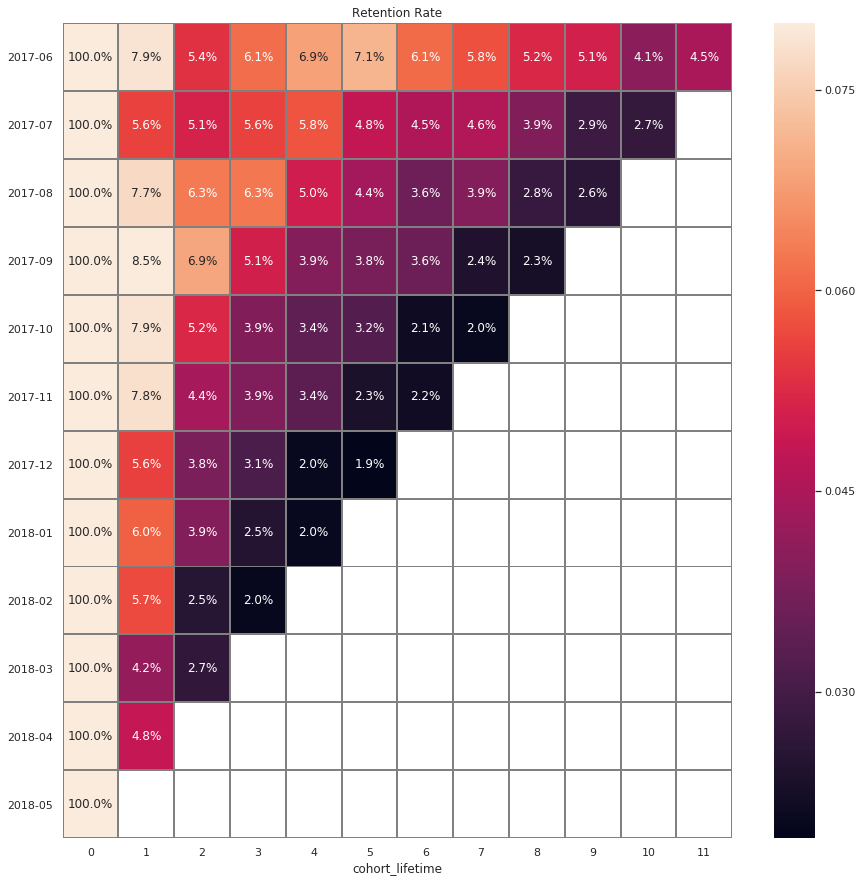

In [31]:
retention_pivot.index = retention_pivot.index.strftime('%Y-%m')

sns.set(style='white')
plt.figure(figsize=(15, 15))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.08)

plt.yticks(rotation=0)
plt.show()

In [32]:
print('Retention на второй месяц — {:.1%}'.format(retention_pivot.mean(axis=0)[2]))

Retention на второй месяц — 4.6%


In [33]:
retention_pivot.head()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN


*Посчитаем метрики продаж. Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки*

In [34]:
first_order_time = orders.groupby(['uid'])['buy ts'].min().reset_index().rename({'buy ts': 'first_order_time'}, axis=1)
first_session_time = visits.groupby(['uid'])['start ts'].min().reset_index().rename({'start ts': 'first_session_time'}, axis=1)
visit_order = first_order_time.merge(first_session_time)
visit_order['time_to_first_order'] =  (visit_order['first_order_time'] - visit_order['first_session_time']).dt.seconds
visit_order_without_null = visit_order.query('time_to_first_order != 0') 
print(int((visit_order['time_to_first_order'].mean() / 60)))

249


In [35]:
visit_order_without_null['time_to_first_order'].mode()[0]

60

*Среднее время между покупкой и первым посещением составляет 249. Однако, мода равняется 60 секундам, что наводит на мысль о неверном заполнении таблицы orders или технической ошибки со временем.*

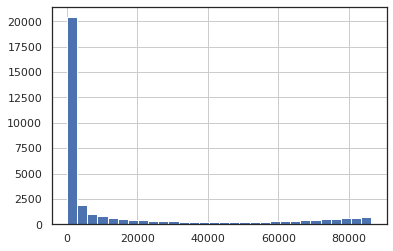

In [36]:
visit_order_without_null['time_to_first_order'].hist(bins=30)
plt.show()

*Рассчитаем среднее количество покупок на одного покупателя за 6 месяцев*

In [37]:
orders

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [38]:
first_purchase_dates = orders.groupby('uid')[
    'buy ts'
].min()
first_purchase_dates.name = 'first_purchase_datetime'

orders = orders.join(first_purchase_dates, on='uid')
orders['buy ts'] = orders['buy ts'].astype(
    'datetime64[M]'
)
orders['first_purchase_month'] = orders[
    'first_purchase_datetime'
].astype('datetime64[M]')

orders['diff'] = orders['buy ts'] - orders['first_purchase_month']
orders['diff'] = (orders['diff']/np.timedelta64(1,'M')).round()

orders_grouped_by_cohorts = orders.groupby(['first_purchase_month', 'diff']).agg({'revenue': 'count', 'uid': 'nunique'}) 
orders_grouped_by_cohorts['orders_per_player'] = (orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'])
mean_orders_pivot = orders_grouped_by_cohorts.pivot_table(index = 'first_purchase_month', columns='diff', values='orders_per_player', aggfunc = 'mean')

In [39]:
mean_orders_pivot

diff,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_purchase_month,,,,,,,,,,,,
2017-06-01,1.163618,2.901639,3.480000,4.185185,3.318182,3.253731,4.451613,3.702128,3.655172,3.400000,2.133333,1.622642
2017-07-01,1.136765,1.923077,2.105263,1.625000,1.469388,2.157895,1.694444,1.282051,1.380952,1.090909,2.038462,NaN
2017-08-01,1.118978,1.862069,1.886792,1.840909,2.125000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09-01,1.136381,1.684615,1.610000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN,NaN,NaN
2017-10-01,1.143779,1.524272,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.788288,1.516667,1.990566,1.679012,1.229167,1.645161,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.849315,1.961165,1.845361,1.720000,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.964912,1.915663,1.488372,1.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.881356,1.431034,1.794872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
orders_grouped_by_cohorts.head(10)

revenue   uid  orders_per_player
first_purchase_month diff                                  
2017-06-01           0.0      2354  2023           1.163618
                     1.0       177    61           2.901639
                     2.0       174    50           3.480000
                     3.0       226    54           4.185185
                     4.0       292    88           3.318182
                     5.0       218    67           3.253731
                     6.0       276    62           4.451613
                     7.0       174    47           3.702128
                     8.0       212    58           3.655172
                     9.0       153    45           3.400000

In [41]:
# отдельно считаем кол-во уникальных клиентов
unique_buyers = orders.groupby(['first_purchase_month', 'diff']).agg({'uid': 'nunique'}) 
unique_buyers.head()

uid
first_purchase_month diff      
2017-06-01           0.0   2023
                     1.0     61
                     2.0     50
                     3.0     54
                     4.0     88

In [42]:
# берём значения только за нулевой месяц (потом удаляем столбец diff)
cohorts_sizes = (unique_buyers.query('diff == 0')
                              .reset_index()
                              .drop('diff', axis=1)
                              .set_index('first_purchase_month')
                                 )
cohorts_sizes

,uid
first_purchase_month,
2017-06-01,2023
2017-07-01,1923
2017-08-01,1370
2017-09-01,2581
2017-10-01,4340
2017-11-01,4081
2017-12-01,4383
2018-01-01,3373
2018-02-01,3651


In [43]:
# считаем количество сделанных заказов
orders_count = orders.groupby(['first_purchase_month', 'diff']).agg({'revenue': 'count'})
orders_count.head()

revenue
first_purchase_month diff         
2017-06-01           0.0      2354
                     1.0       177
                     2.0       174
                     3.0       226
                     4.0       292

In [44]:
# джойним к этой таблице значения численности когорт cohorts_sizes
orders_count = orders_count.join(cohorts_sizes)
orders_count.head()

revenue   uid
first_purchase_month diff               
2017-06-01           0.0      2354  2023
                     1.0       177  2023
                     2.0       174  2023
                     3.0       226  2023
                     4.0       292  2023

In [45]:
# считаем количество заказов на клиента
orders_count['orders_per_payer'] = orders_count['revenue']/orders_count['uid']
orders_count.head()

revenue   uid  orders_per_payer
first_purchase_month diff                                 
2017-06-01           0.0      2354  2023          1.163618
                     1.0       177  2023          0.087494
                     2.0       174  2023          0.086011
                     3.0       226  2023          0.111715
                     4.0       292  2023          0.144340

In [46]:
# формируем сводную
mean_orders_pivot = orders_count.pivot_table(index = 'first_purchase_month', 
                                             columns='diff', 
                                             values='orders_per_payer', 
                                             aggfunc = 'mean')
mean_orders_pivot

diff,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_purchase_month,,,,,,,,,,,,
2017-06-01,1.163618,0.087494,0.086011,0.111715,0.144340,0.107761,0.136431,0.086011,0.104795,0.075630,0.047454,0.042511
2017-07-01,1.136765,0.052002,0.062402,0.054082,0.037441,0.042642,0.031721,0.026001,0.030161,0.012480,0.027561,NaN
2017-08-01,1.118978,0.078832,0.072993,0.059124,0.062044,0.045255,0.035766,0.056934,0.033577,0.033577,NaN,NaN
2017-09-01,1.136381,0.084851,0.062379,0.063541,0.025959,0.042232,0.041844,0.021697,0.023634,NaN,NaN,NaN
2017-10-01,1.143779,0.072350,0.037327,0.028111,0.029724,0.023733,0.019816,0.028802,NaN,NaN,NaN,NaN
2017-11-01,1.179368,0.097280,0.044597,0.051703,0.033325,0.014457,0.024994,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,0.061602,0.046087,0.040840,0.019621,0.023956,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,0.066410,0.047139,0.018974,0.023125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,0.060805,0.022733,0.019173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# применяем накопление
mean_orders_pivot = mean_orders_pivot.cumsum(axis=1)
mean_orders_pivot

diff,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_purchase_month,,,,,,,,,,,,
2017-06-01,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.837370,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07-01,1.136765,1.188768,1.251170,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,NaN
2017-08-01,1.118978,1.197810,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.597080,NaN,NaN
2017-09-01,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,NaN,NaN,NaN
2017-10-01,1.143779,1.216129,1.253456,1.281567,1.311290,1.335023,1.354839,1.383641,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.276648,1.321245,1.372948,1.406273,1.420730,1.445724,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.187963,1.235102,1.254076,1.277201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.182416,1.205149,1.224322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# отвечаем на вопрос: 
# "рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев"
print(mean_orders_pivot[6].mean().round(2))

1.5


<hr style="border: 1px solid #000;"> 

*Рассчитаем средний чек*

In [49]:
orders['revenue'].mean()

4.999646930477041

*Выясним, как меняется LTV на покупателя по когортам*

In [50]:
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
orders_new = pd.merge(orders,first_orders, on='uid')

cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
margin_rate = 1.0

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']
# ltv6months = report[report['first_order_month'] <= '2017-11-01']
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2).cumsum(axis=1)

output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


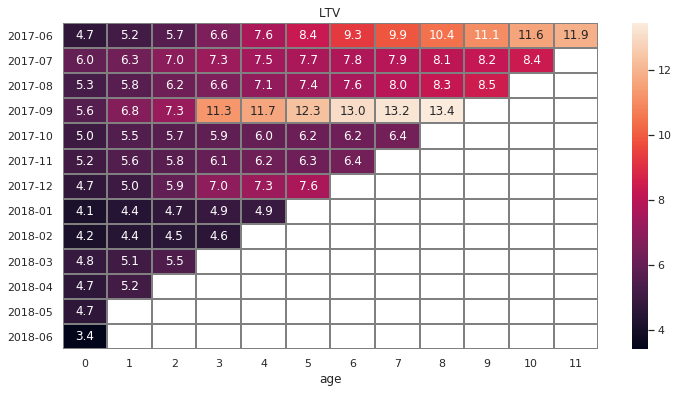

In [51]:
output.index = output.index.strftime('%Y-%m')

sns.set(style='white')
plt.figure(figsize=(12, 6))
plt.title('LTV')
sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, linecolor='gray');


*Посчитаем метрики маркетинга. Посчитаем общую сумму расходов на маркетинг и выясним, как траты распределены по источникам*

In [52]:
costs['costs'].sum()

329131.62

In [53]:
costs['costs_month'] = costs['dt'].dt.month
costs['costs_year'] = costs['dt'].dt.year
costs

,source_id,dt,costs,month,costs_month,costs_year
0,1,2017-06-01,75.20,2017-06-01,6,2017
1,1,2017-06-02,62.25,2017-06-01,6,2017
2,1,2017-06-03,36.53,2017-06-01,6,2017
3,1,2017-06-04,55.00,2017-06-01,6,2017
4,1,2017-06-05,57.08,2017-06-01,6,2017
...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01,5,2018
2538,10,2018-05-28,21.26,2018-05-01,5,2018
2539,10,2018-05-29,11.32,2018-05-01,5,2018
2540,10,2018-05-30,33.15,2018-05-01,5,2018


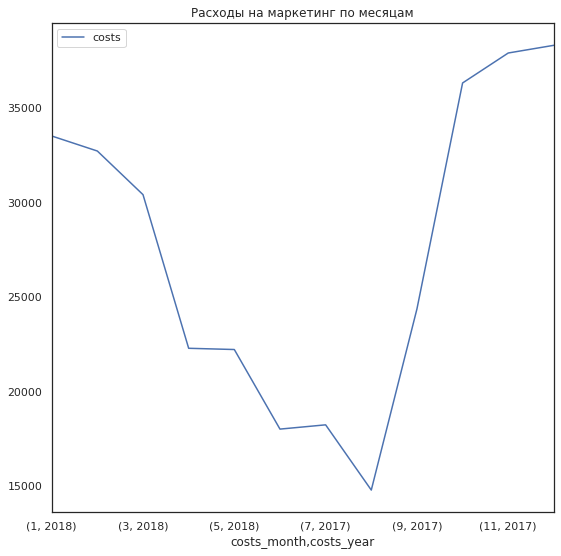

In [54]:
costs_by_month = costs.groupby(['costs_month', 'costs_year']).agg({'costs':'sum'}).plot(figsize=(9, 9), title='Расходы на маркетинг по месяцам');

*Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика*

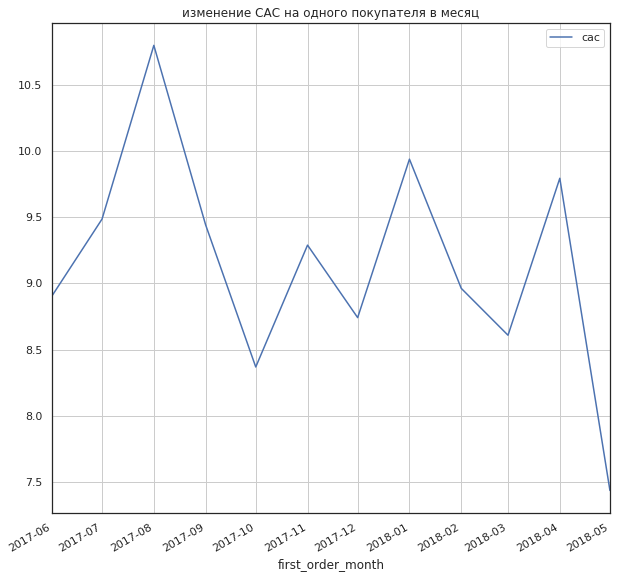

In [55]:
monthly_costs = costs.groupby('month')['costs'].sum()
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.plot(x='first_order_month', y='cac', figsize=(10, 10), grid=True, title='изменение CAC на одного покупателя в месяц');

In [56]:
visits.rename(columns={'start ts': 'start_ts'}, inplace=True)
visits

,device,end ts,source id,start_ts,uid,session_year,session_month,session_week,session_date,session_day,session_duration_sec,first_activity_time,first_session_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,20,1080,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,19,1680,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,1,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,20,1440,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,27,0,2017-12-27 14:06:00,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,2017-07-01,30,2017-07-29,29,19,2017-07-29 19:07:00,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,2018-01-01,4,2018-01-25,25,19,2018-01-25 17:38:00,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,2018-03-01,9,2018-03-03,3,19,2018-03-03 10:12:00,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,2017-11-01,44,2017-11-02,2,19,2017-11-02 10:12:00,2017-11-01,0


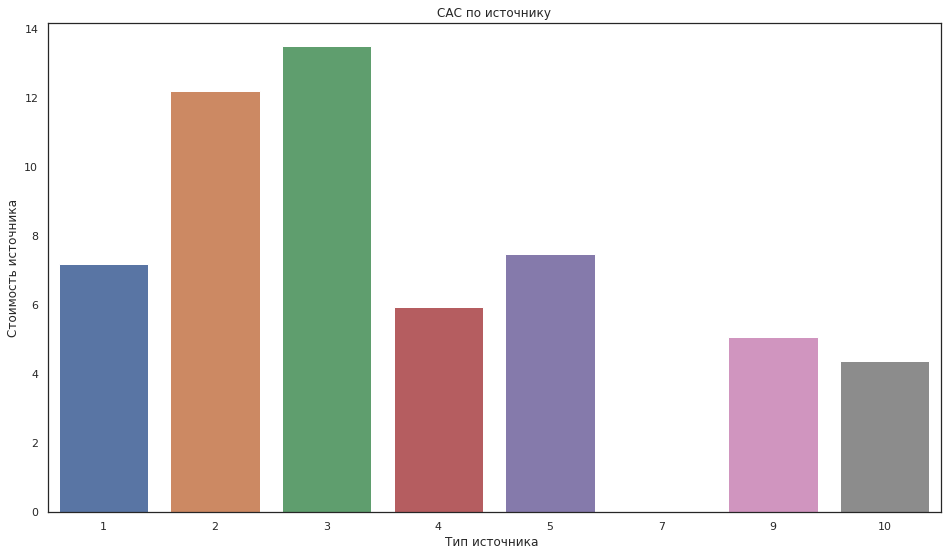

In [57]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source.reset_index()
visits_by_source = visits.query('start_ts == first_activity_time')
customers_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source id').agg({'uid':'nunique'}).rename(columns={'uid':'customers'})
customers_by_source.reset_index()
cac = customers_by_source.join(costs_by_source).reset_index()
cac = cac.fillna(0)
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source id", y="cac", data=cac)
plt.title('CAC по источнику')
ax.set_xlabel('Тип источника ')
ax.set_ylabel('Стоимость источника')
plt.show()

*Рассчитайте ROMI по когортам в разрезе источников*

In [58]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output1 = report_new.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
output1 = output1.cumsum(axis=1).round(2)
output1

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


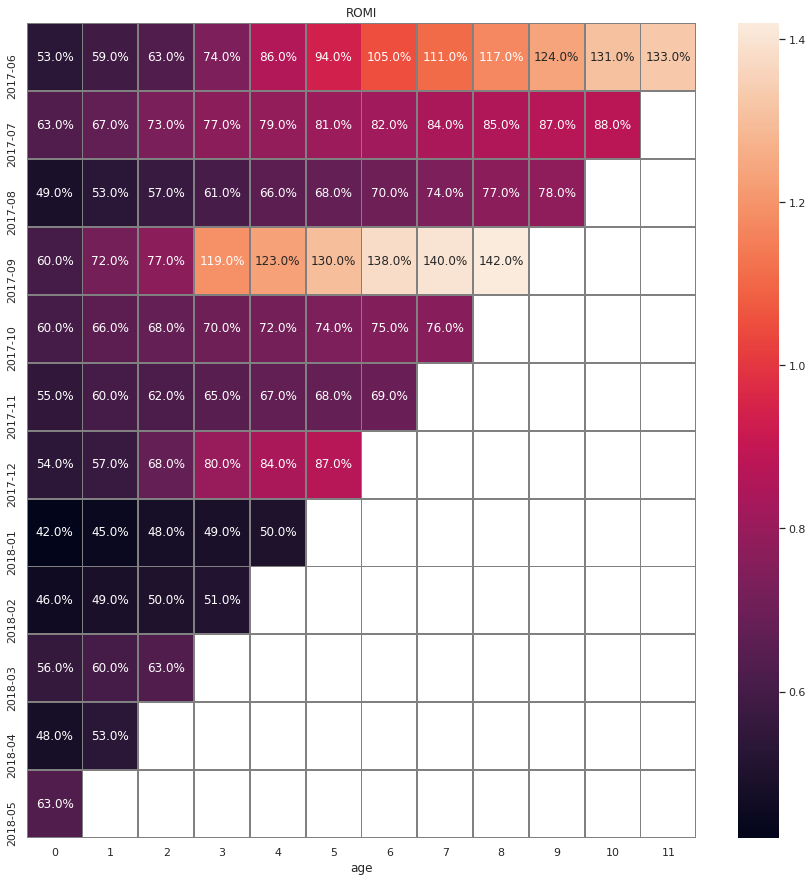

In [59]:
output1.index = output1.index.strftime('%Y-%m')
sns.set(style='white')
plt.figure(figsize=(15, 15))
plt.title('ROMI')
sns.heatmap(output1, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

In [60]:
score = costs.merge(report_new, left_on='month', right_on='order_month')
score

,source_id,dt,costs_x,month,costs_month,costs_year,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs_y,cac,romi
0,1,2017-06-01,75.20,2017-06-01,6,2017,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.00,8.905091,0.530530
1,1,2017-06-02,62.25,2017-06-01,6,2017,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.00,8.905091,0.530530
2,1,2017-06-03,36.53,2017-06-01,6,2017,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.00,8.905091,0.530530
3,1,2017-06-04,55.00,2017-06-01,6,2017,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.00,8.905091,0.530530
4,1,2017-06-05,57.08,2017-06-01,6,2017,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.00,8.905091,0.530530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16441,10,2018-05-31,17.60,2018-05-01,5,2018,2018-01-01,3373,2018-05-01,211.48,211.48,4,0.062698,33518.52,9.937302,0.006309
16442,10,2018-05-31,17.60,2018-05-01,5,2018,2018-02-01,3651,2018-05-01,270.70,270.70,3,0.074144,32723.03,8.962758,0.008272
16443,10,2018-05-31,17.60,2018-05-01,5,2018,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559,30415.27,8.608907,0.036655
16444,10,2018-05-31,17.60,2018-05-01,5,2018,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599,22289.38,9.793225,0.054282


In [61]:
score['romi'] = score['ltv'] / score['cac']

score_output = score.pivot_table(
    index='source_id', columns='age', values='romi', aggfunc='mean')

In [62]:
score_output_cumsum = score_output.cumsum(axis=1).round(3)
score_output_cumsum.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.542,0.591,0.634,0.724,0.762,0.798,0.838,0.869,0.9,0.934,0.973,1.002
2,0.542,0.591,0.634,0.724,0.762,0.798,0.838,0.869,0.9,0.934,0.973,1.002
3,0.542,0.591,0.634,0.724,0.762,0.798,0.838,0.869,0.9,0.934,0.973,1.002
4,0.542,0.591,0.634,0.724,0.762,0.798,0.838,0.869,0.9,0.934,0.973,1.002
5,0.542,0.591,0.634,0.724,0.762,0.798,0.838,0.870,0.9,0.934,0.974,1.003
9,0.542,0.591,0.634,0.724,0.762,0.798,0.838,0.869,0.9,0.934,0.973,1.002
10,0.542,0.591,0.634,0.724,0.762,0.798,0.838,0.869,0.9,0.934,0.973,1.002


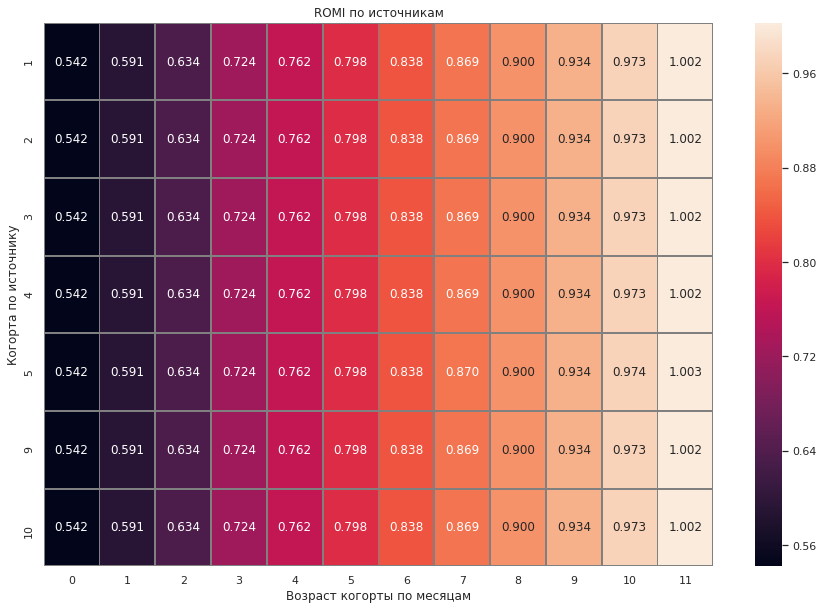

In [63]:
plt.figure(figsize=(15, 10))
sns.heatmap(score_output_cumsum, annot=True, fmt='.3f', linewidths=1, linecolor='gray');
plt.xlabel('Возраст когорты по месяцам')
plt.ylabel('Когорта по источнику')
plt.title('ROMI по источникам');

In [64]:
# узнаем первый источник по каждому посетителю
first_visit_source = (visits.sort_values('start_ts')
                            .groupby('uid')['source id'].first()
                            .to_frame()
                     )

# создаем сводную на базе датасета с заказами, куда добавляем столбец с первым рекламным источником
orders_with_source = orders.join(first_visit_source, on='uid')
orders_with_source['order_month'] = orders_with_source['buy ts'].astype('datetime64[M]')

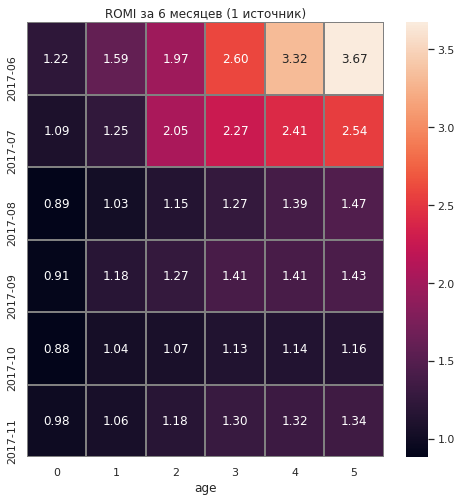

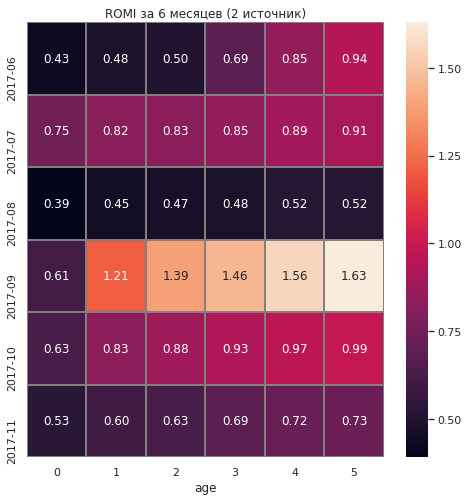

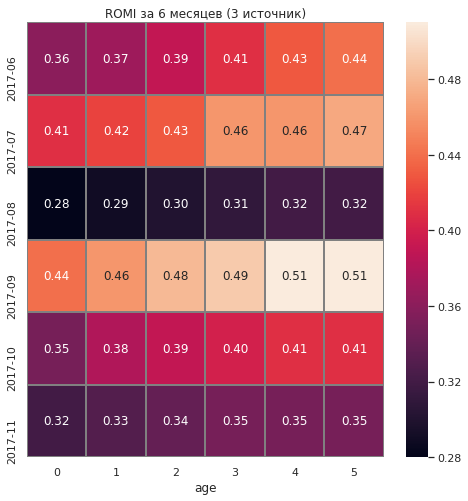

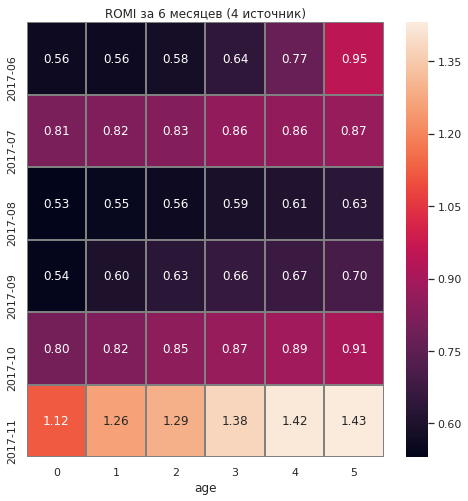

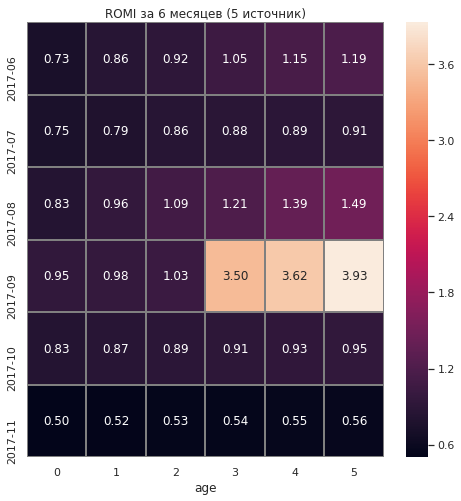

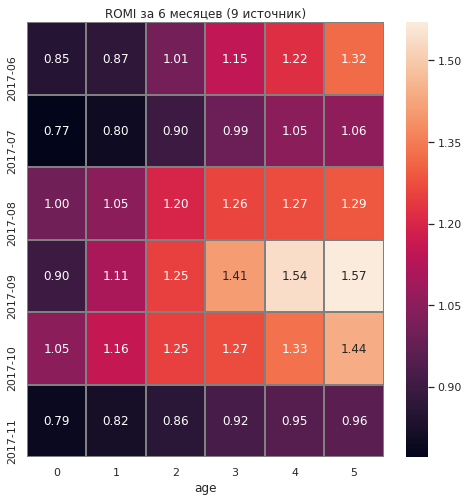

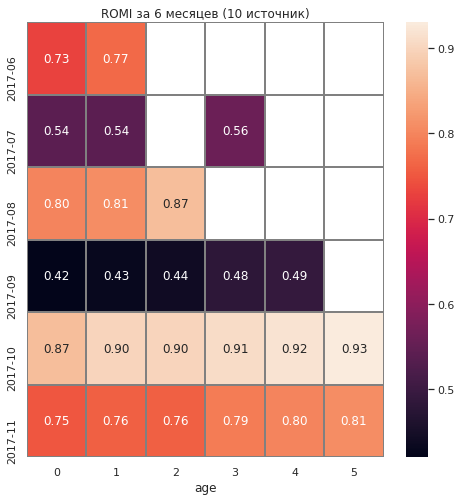

In [65]:
for source in sorted(orders_with_source['source id'].unique()):
    # берем клиентов только нужного источника
    orders_needed_source = orders_with_source[orders_with_source['source id'] == source]
    orders_needed_source['order_month'] = orders_needed_source['buy ts'].astype('datetime64[M]')

    first_orders = orders_needed_source.groupby('uid').agg({'order_month': 'min'}).reset_index()
    first_orders.columns = ['uid', 'first_order_month']

    cohort_sizes = (
        first_orders.groupby('first_order_month')
        .agg({'uid': 'nunique'})
        .reset_index()
    )
    cohort_sizes.columns = ['first_order_month', 'n_buyers']
    orders_new = pd.merge(orders_needed_source,first_orders, on='uid')

    cohorts = (
        orders_new.groupby(['first_order_month', 'order_month'])
        .agg({'revenue': 'sum'})
        .reset_index()
    )

    report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
    margin_rate = 1.0

    report['gp'] = report['revenue'] * margin_rate
    report['age'] = (
        report['order_month'] - report['first_order_month']
    ) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')

    report['ltv'] = report['gp'] / report['n_buyers']
    output = report.pivot_table(
        index='first_order_month', columns='age', values='ltv', aggfunc='mean'
    ).round(2).cumsum(axis=1)

    output.index = output.index.strftime('%Y-%m')

    monthly_costs = costs[costs['source_id'] == source].groupby('month')['costs'].sum()
    
    # не отрисовываем источники, по которым нет затрат (например, 7ой источник)
    if len(monthly_costs) > 0:
        report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
        report_new['cac'] = report_new['costs'] / report_new['n_buyers']

        report_new['romi'] = report_new['ltv'] / report_new['cac']
        output1 = report_new.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
        output1.index = output1.index.strftime('%Y-%m')
        output1 = output1.cumsum(axis=1).round(2)



        plt.figure(figsize=(8, 8))
        plt.title(f'ROMI за 6 месяцев ({source} источник)')
        sns.heatmap(output1.iloc[:6,:6], annot=True, fmt='.2f', linewidths=1, linecolor='gray')
        plt.show()

## Напишем вывод: рекомендация для маркетологов, куда и сколько им стоит вкладывать денег?

*Третий источник самый дорогой по маркетинговы затратам, но имеет один из минимальных ROI, так что я бы посоветовал обратить на него внимание. Хорошее привелечение пользователей по времени, но слабое удержание и конвертация в покупку - это занимает у пользователя много времени. Кагорты 1го, 5го и 9го источника окупились на 6й месяц жизни(ROMI > 1). Значит, наша рекламная кампания приводит тех, кто хорошо платит. Очень близки к этому и когорты 2го источника. Больше всех выделяются: первая когорта первого источника, четвертая когорта второго источника, четвертая когорта пятого источника и четвертая когорта девятого источника. Это отличный результат. Эти когорты требует отдельного исследования для уточнения поведения пользователей. Чем и как мы их так привлекли, что они генерируют нам такую выручку и, соответственно, такой ROMI.*